In [1]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt

from skimage.color import rgb2gray,rgb2hsv
from skimage.util import random_noise
from skimage.exposure import histogram

from matplotlib.pyplot import bar

%matplotlib inline

# Basic image processing

In [2]:

def show_images(images, titles=None, cmap = None):
    '''
    This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    images[0] will be drawn with the title titles[0] if exists
    '''
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

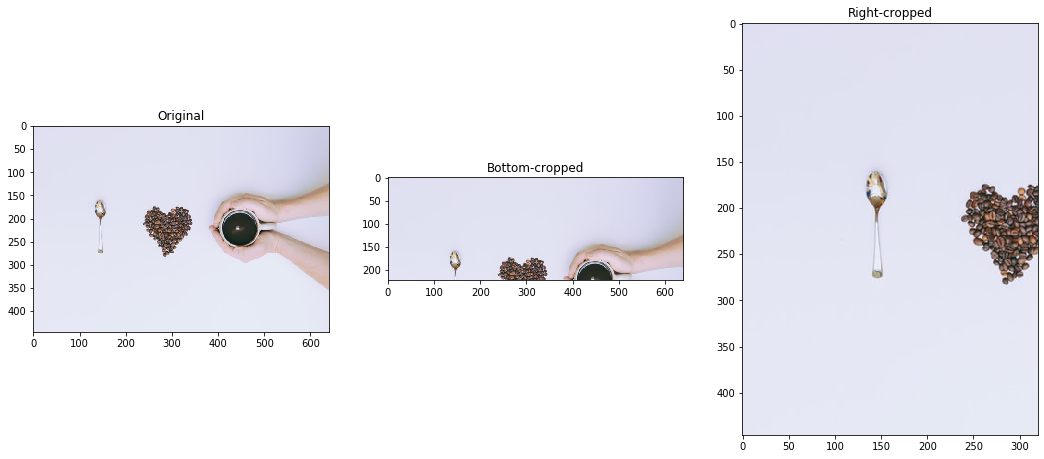

In [3]:
'''
Cropping images
'''

coffeeImage = io.imread('./images/coffee.jpeg')
coffeeImageBottomCropped = coffeeImage[:coffeeImage.shape[0]//2]
coffeeImageRightCropped = coffeeImage[:,:coffeeImage.shape[1]//2]

show_images([coffeeImage,coffeeImageBottomCropped, coffeeImageRightCropped], 
            ["Original", "Bottom-cropped", "Right-cropped"])



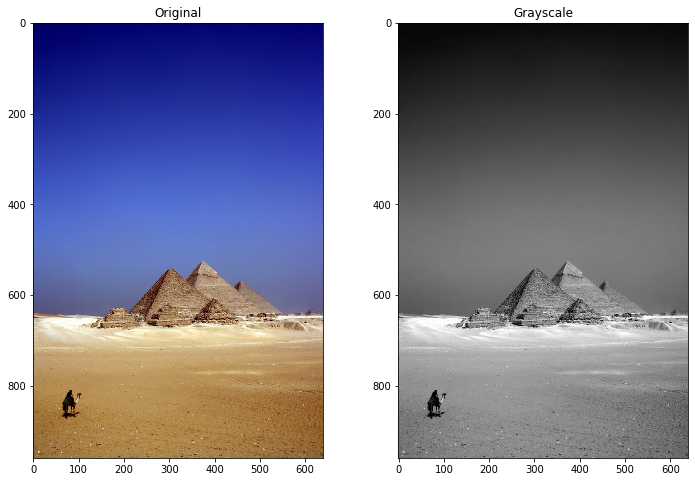

In [4]:
'''
RGB to gray scale
'''
def show_gray_image(image):
    imageGrayScaled = rgb2gray(image)
    show_images([image, imageGrayScaled], ["Original", "Grayscale"])
    
pyramids = io.imread("./images/pyramids.jpeg")
show_gray_image(pyramids)

In [5]:
'''
RGB to HSV
'''

def show_hsv_image(image):
    # get hsv components
    hsv_img = rgb2hsv(image)
    hue_component = hsv_img[:,:,0]
    saturation_component = hsv_img[:,:,1]
    value_component = hsv_img[:,:,2]
    
    # plot components
    fig = plt.figure()
    num_images = 5

    image_subplot = fig.add_subplot(1, num_images, 1)
    image_subplot.set_title('Original')
    plt.imshow(image)
    
    # check: https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_rgb_to_hsv.html
    # for cmap option
    hsv_image_subplot = fig.add_subplot(1, num_images, 2)
    hsv_image_subplot.set_title('HSV representation')
    plt.imshow(hsv_img, cmap='hsv')
    
    hsv_image_subplot = fig.add_subplot(1,num_images,3)
    hsv_image_subplot.set_title('Hue component')
    plt.imshow(hue_component, cmap='hsv')
    
    saturation_subplot = fig.add_subplot(1,num_images,4)
    saturation_subplot.set_title('Saturation component')
    plt.imshow(saturation_component)
    
    value_subplot = fig.add_subplot(1,num_images,5)
    value_subplot.set_title('Value component')
    plt.imshow(value_component)

    fig.set_size_inches(np.array(fig.get_size_inches()) * num_images)
    plt.show()

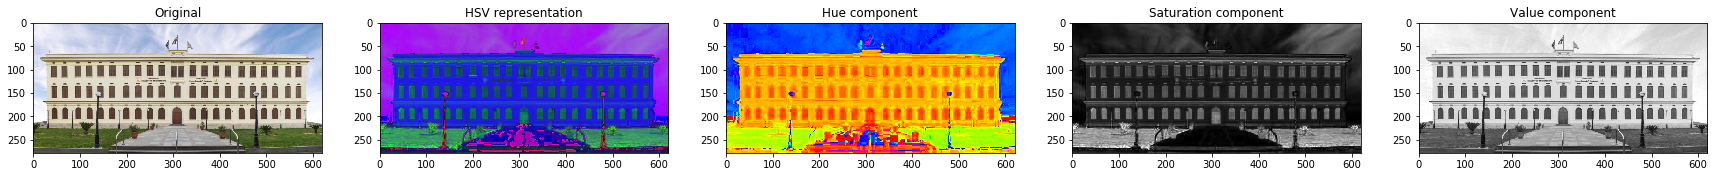

In [6]:
img = io.imread("./images/hsv/ex1.png")
show_hsv_image(img)

Note:
- Hue: represents the base color of the image
- Saturation: the colorfulness of the pixel
- Value: represents the light intensity


In [7]:
'''
salt & pepper noise
'''

def apply_sp_noise(image_path):
    image = rgb2gray(io.imread(image_path))
    
    noise_factors = [0.05, 0.5, 0.9] # Higher values represent more salt.
    
    noisy_images = []
    noisy_images_titles = []
    
    for noise_factor in noise_factors:
        noisy_images.append(
            random_noise(image=image, mode='s&p', amount=noise_factor)
        )
        
        noisy_images_titles.append('Noisy with %.2f factor' % noise_factor)
        
    show_images([image, *noisy_images], ["Gray scale", *noisy_images_titles])

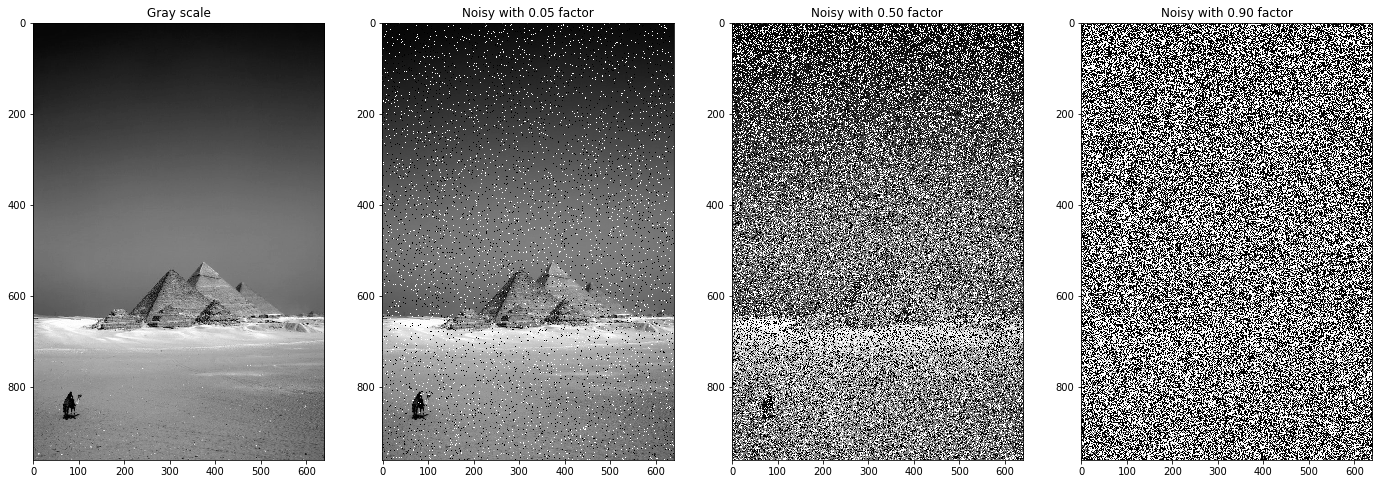

In [8]:
apply_sp_noise("./images/pyramids.jpeg")

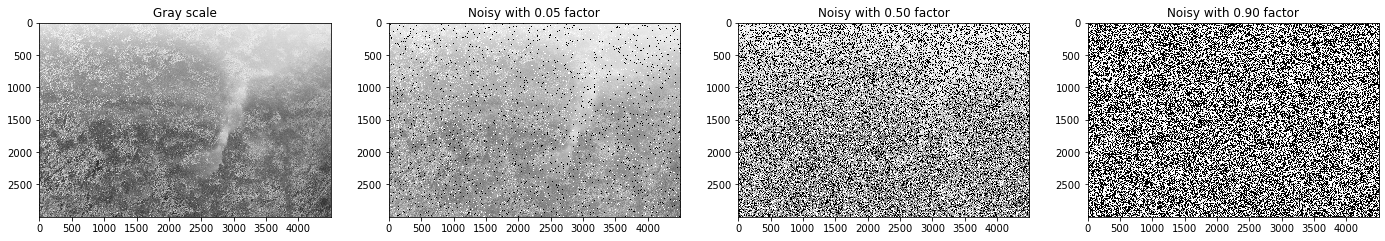

In [9]:
apply_sp_noise("./images/histogram/ex1.jpg")

why isn't this image affected?
The s&p noise can be caused by sharp and sudden disturbances in the image signal. The original image already has sudden changes thus it's not affected that much.

# Histogram

In [10]:
def show_histogram(image):
    '''
    Takes a colored image and plots it's grey scale histogram
    '''
    fig = plt.figure()

    # plot original image
    image_fig = fig.add_subplot(2,2,1)
    image_fig.set_title("Original image")
    plt.imshow(image)

    # plot greyscale image
    gray_scale_image = rgb2gray(image)
    gray_scale_image_fig = fig.add_subplot(2,2,3)
    gray_scale_image_fig.set_title("Greyscale image")
    plt.imshow(gray_scale_image)
    
    # get histogram of the grayscaled image
    histogram, bin_edges = np.histogram(gray_scale_image, bins=256, range=(0, 1))
    
    # plot histogram
    histogram_fig = fig.add_subplot(1,2,2)
    histogram_fig.set_title("Grayscale Histogram")
    histogram_fig.set_xlabel("grayscale value")
    histogram_fig.set_ylabel("pixels")
    histogram_fig.set_xlim([0.0, 1.0])
    plt.plot(bin_edges[0:-1], histogram)

    fig.set_size_inches(np.array(fig.get_size_inches()) * 3)
    plt.show()

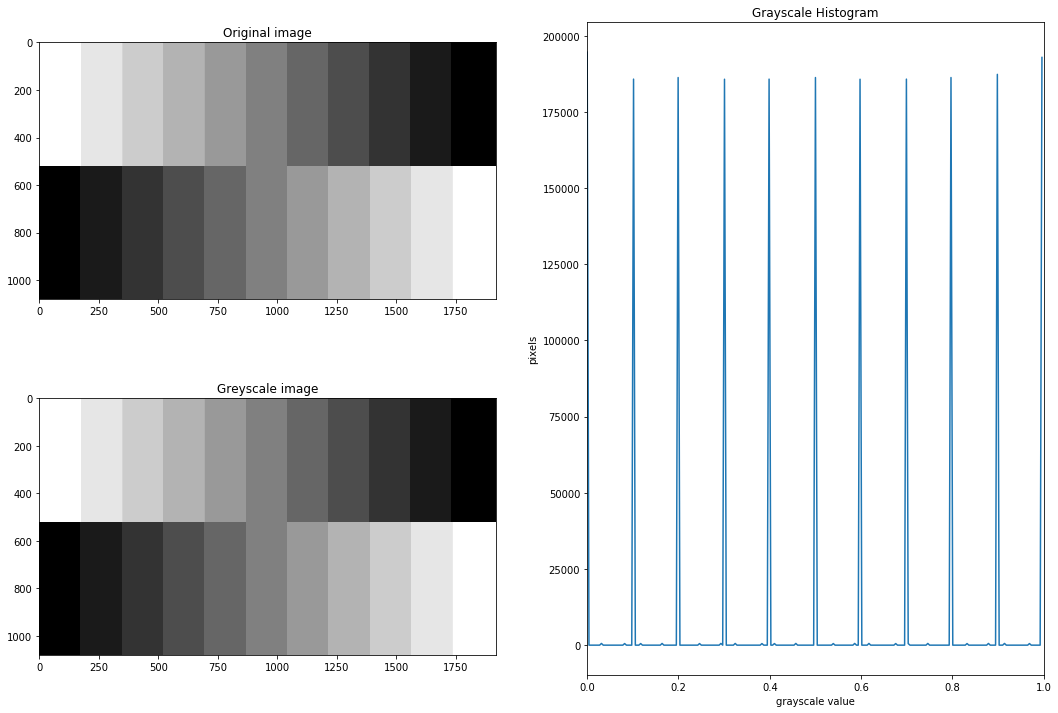

In [11]:
image = io.imread("./images/histogram/ex2.png")
show_histogram(image)

In [12]:
'''
Draw a grey-scale image that has uniform histogram 
same number of pixels for all intensity levels) using code only. Let the size of the image be 256x256.
'''

def get_image_with_uniform_histogram():
    return np.random.choice(np.arange(0, 1, 0.00001), replace=False, size=(256, 256))

are all pixels unique? True


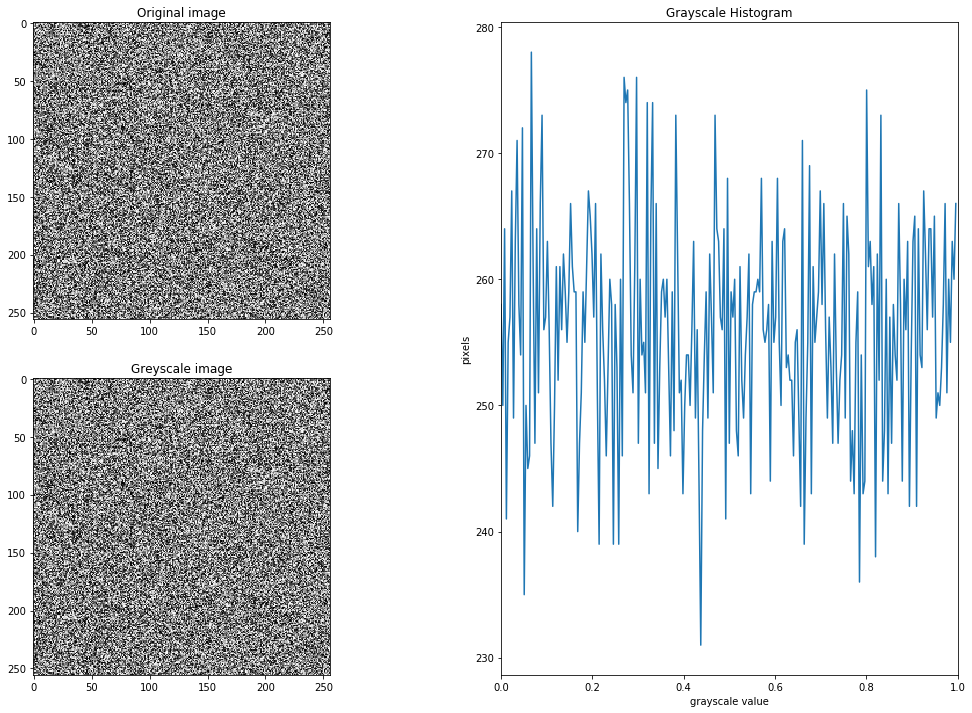

In [13]:
uniform_histogram_img = get_image_with_uniform_histogram()
print("are all pixels unique?", len(np.unique(uniform_histogram_img)) == 256*256)
show_histogram(uniform_histogram_img)